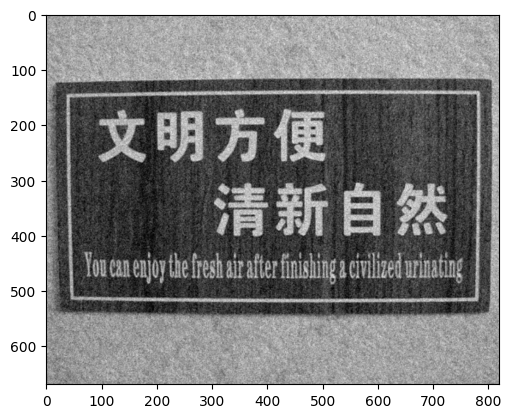

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

img = Image.open('diffusion.png')
arr = np.array(img).astype(np.float32)

plt.imshow(np.round(arr).astype(int))
plt.show()

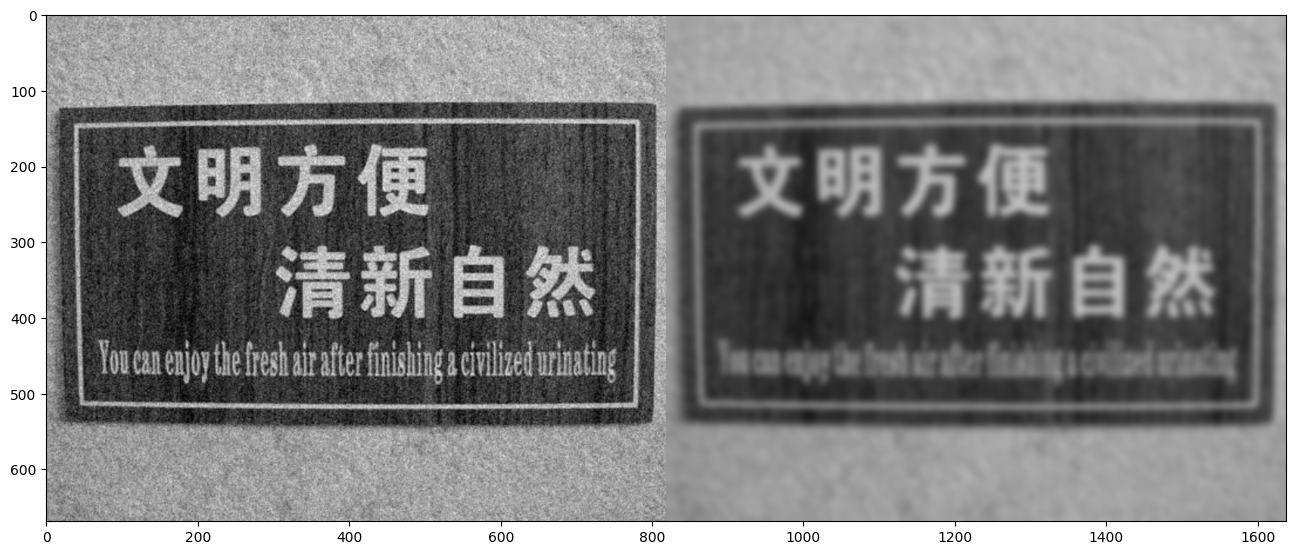

In [2]:
from scipy.ndimage import convolve

tau, h, n_steps = 0.1, 1, 100
arr_d = np.copy(arr)
kernel = np.array([
    [0, tau / (h ** 2), 0],
    [tau / (h ** 2), 1 - (4 * tau) / (h ** 2), tau / (h ** 2)],
    [0, tau / (h ** 2), 0]
])
for n in range(n_steps):
    arr_d = convolve(arr_d, kernel[:, :, np.newaxis], mode='mirror')

plt.figure(figsize=(16, 8))
both = np.concatenate((arr, arr_d), axis=1)
plt.imshow(np.round(both).astype(int))
plt.show()

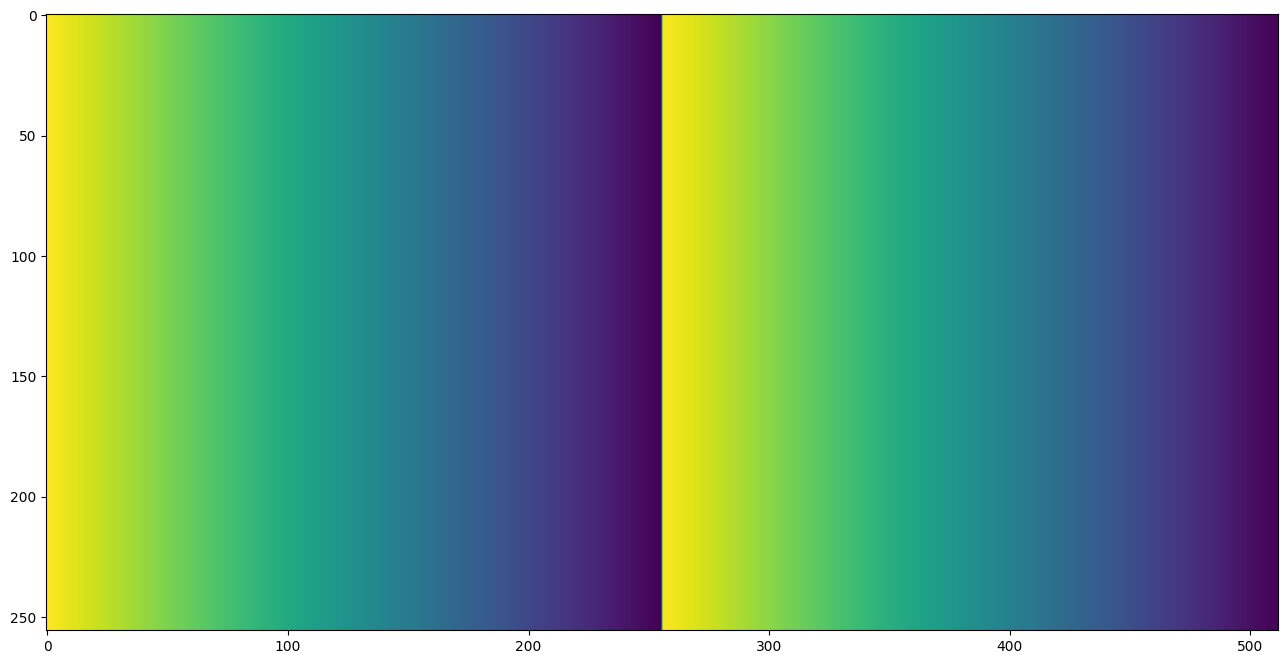

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 256x256 gradient image
height, width = 256, 256

# Generate a 2D gradient
gradient = np.linspace(1, 0, width)
gradient_image = np.tile(gradient, (height, 1))

tau, h, n_steps = 0.1, 1, 100
arr_d = np.copy(gradient_image)
kernel = np.array([
    [0, tau / (h ** 2), 0],
    [tau / (h ** 2), 1 - (4 * tau) / (h ** 2), tau / (h ** 2)],
    [0, tau / (h ** 2), 0]
])
for n in range(n_steps):
    arr_d = convolve(arr_d, kernel, mode='mirror')

plt.figure(figsize=(16, 8))
both = np.concatenate((gradient_image, arr_d), axis=1)
plt.imshow(both)
plt.show()

## Linear isotropic

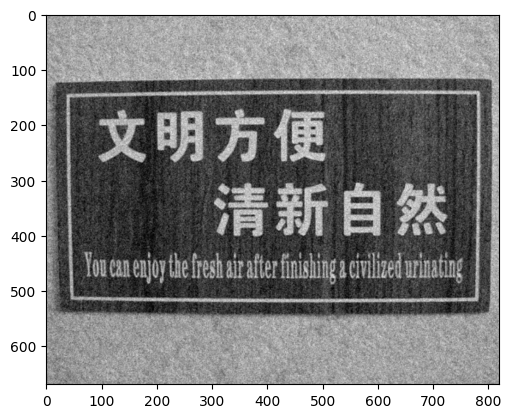

In [4]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

I = np.array(Image.open('diffusion.png')).astype(np.float32)

plt.imshow(np.round(I).astype(int))
plt.show()

In [51]:
from scipy.ndimage import convolve

def get_divergence(u):
    l = 30
    
    kernel = np.array([
        [0, -1/2, 0],
        [0,    0, 0],
        [0,  1/2, 0]
    ])
    dyu = convolve(u, kernel[:, :, np.newaxis], mode='mirror')
    dxu = convolve(u, kernel.T[:, :, np.newaxis], mode='mirror')
    
    g = np.exp(-(dyu ** 2 + dxu ** 2) / (l ** 2))
    
    # plt.imshow(g)
    # plt.show()
    
    kernel = np.array([
        [0,   0, 0],
        [0, 1/2, 0],
        [0, 1/2, 0]
    ])
    
    gy = convolve(g, kernel[:, :, np.newaxis], mode='mirror')
    gx = convolve(g, kernel.T[:, :, np.newaxis], mode='mirror')
    
    kernel = np.array([
        [0,  0, 0],
        [0, -1, 0],
        [0,  1, 0]
    ])
    
    dyu = convolve(u, kernel[:, :, np.newaxis], mode='mirror')
    dxu = convolve(u, kernel.T[:, :, np.newaxis], mode='mirror')
    
    kernel = np.array([
        [0, -1, 0],
        [0,  1, 0],
        [0,  0, 0]
    ])
    
    div = convolve(np.multiply(gy, dyu), kernel[:, :, np.newaxis], mode='mirror') \
            + convolve(np.multiply(gx, dxu), kernel.T[:, :, np.newaxis], mode='mirror')
    
    # plt.imshow((div - div.min()) / (div.max() - div.min()))
    # plt.show()

    return div

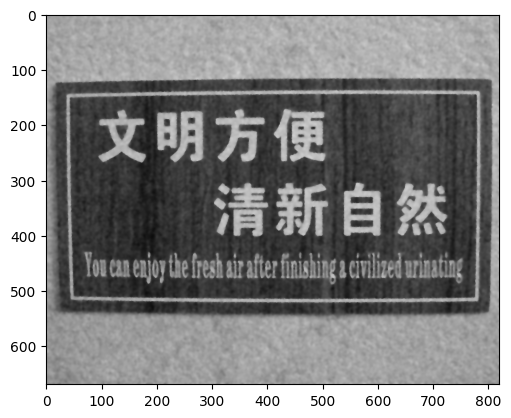

In [54]:
tau, h, n_steps = 0.1, 1, 20
u = np.copy(I)
for n in range(n_steps):
    u += tau * get_divergence(u)

plt.imshow(np.round(u).astype(int))
plt.show()